오라 우리가 여호와께로 돌아가자 여호와께서 우리를 찢으셨으나 도로 낫게 하실 것이요 우리를 치셨으나 싸매어 주실 것임이라 (호6:1)

-------

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> Chapter 1-2. NumPy Arrays: 배열의 생성과 변형 및 조작 </b>

__학습 목표__

- 넘파이 배열의 생성하는 다양한 방법을 익힌다.
- 넘파이 배열을 다루는 다양한 함수를 익힌다.

__학습 내용__
1. 배열의 자료형
1. 배열 만들기
1. 배열 형상 다루기
1. 배열 합치기
1. 배열 나누기
1. 배열 정렬하기
1. 배열 조건 색인


# 배열의 자료형 
배열 자료형은 언제나 원소가 모두 같은 자료형이어야 합니다. 물론, 넘파이의 배열 즉, `ndarray` 클래스는 원소가 모두 같은 자료형이어야 합니다.  `array` 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면` dtype` 인수를 사용합니다. 만약 `dtype` 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추합니다. 이미 만들어진 배열의 자료형을 알아내려면 `dtype` 속성을 보면 됩니다.

In [111]:
import numpy as np

x = np.array([1, 2, 3])
x.dtype

dtype('int32')

In [112]:
x = np.array([1.0, 2.0, 3])
x.dtype

dtype('float64')

In [113]:
a = np.array([0,0,1,1], dtype=bool)
b = np.array([0,1,0,1], dtype=bool)
print(a)
print(b)

[False False  True  True]
[False  True False  True]


`dtype` 인수로 지정할 자료형은 다음 표에 보인것과 같은 `dtype` 접두사로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미합니다. 예를 들어 `f8`은 8바이트(64비트) 부동소수점 실수를 뜻하고 `U4` 는 4글자 유니코드 문자열을 뜻한다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정합니다.

<center><img src = "https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/numpy_dtype.png?raw=true" width = "600">

## NumPy Constants

넘파이에는 미리 정의된 상수(constant)들이 있는데, 그 중에서 자주 사용하는 몇 개를 소개합니다.  

> `numpy.inf      `  (양의) 무한대의 IEEE 754 부동소수점 표현   
> `numpy.nan      `  'Not a Number (Nan)'의 IEEE 754 부동소수점 표현   
> `numpy.NINF     `  음의 무한대의 IEEE 754 부동소수점 표현, -inf   
> `numpy.e        `  오일러 상수, 자연로그의 밑수, 네이피어 상수 (Napier’s constant).     
> `               `  e = 2.71828182845904523536028747135266249775724709369995…   
> `numpy.newaxis  `  None의alias, 배열의 인덱싱에 유용함.   
> `numpy.pi       `  pi = 3.1415926535897932384626433…   

### Example 1 - np.nan, np.inf


넘파이에서는 무한대를 표현하기 위한 `np.inf`(infinity)와 정의할 수 없는 숫자를 나타내는 `np.nan`(not a number)을 사용할 수 있습니다. 

다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 `np.inf`가 나옵니다. 0을 0으로 나누려고 시도하면 `np.nan`이 나옵니다. 



In [114]:
# You may see some warnings if you don't have the next two lines
import warnings;
warnings.filterwarnings('ignore');

np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

In [115]:
np.log(0)

-inf

In [116]:
np.exp(-np.inf)

0.0

### Example 2 - 로그 함수

로그 함수의 그래프를 관찰하면, np.log(0)의 값은 -inf로 수렴하는 것과 np.log(1)의 값은 0인 것을 확인할 수 있습니다. 

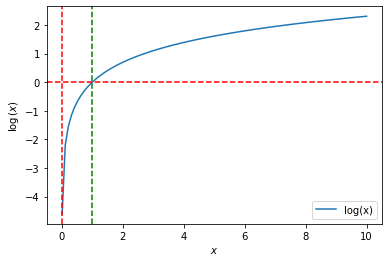

In [117]:
import matplotlib.pyplot as plt

x = np.linspace(0.01, 10, 100)
plt.plot(x, np.log(x), label='log(x)')
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='g', ls="--")
plt.xlabel('$x$')
plt.ylabel('$\log{(x)}$')
plt.legend()
plt.show()

### Example 3 - 지수 함수
지수 함수의 그래프를 관찰하면, 다음과 같은 사항들을 확인할 수 있습니다. 

- np.exp(0)의 값은 1이다.  
- np.exp(-inf)의 값은 0으로 수렴한다. 
- np.exp(inf)의 값은 양의 무한대로 수렴한다. 
- $x_1 \gt x_2$ 이면, $e^{x_1} \gt e^{x_2}$ 이다. 

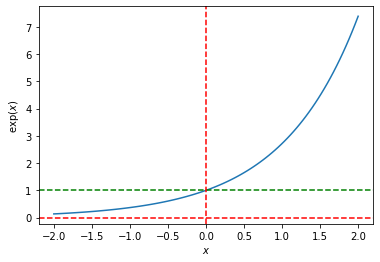

In [118]:
x = np.linspace(-2, 2, 100)
plt.plot(x, np.exp(x))
plt.axhline(1, c='g', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

# 배열 만들기 

## 배열 생성 함수

배열에 형상을 튜플로 지정하면, 원소의 값을 초기화해서 배열/행렬을 생성하는 다양한 함수들이 있습니다. 


> `zeros          ` 지정된 shape의 배열을 생성하고, 원소를 모두 0으로 초기화   
> `zeros_like     ` 주어진 배열의 shape(형상)을 가져오고, 0로 초기화한 배열을 생성함   
> `ones_like      ` 주어진 배열의 shape(형상)을 가져오고, 1로 초기화한 배열을 생성함    
> `ones           ` 지정된 shape의 배열을 생성하고, 원소를 모두 1로 초기화   
> `full           ` 지정된 shape의 배열을 생성하고, 원소를 모두 지정한 한 값으로 초기화  
> `identity       ` identity(항등) 행렬- 대각선의 값이 전부 1이고, 나머지는 0으로 채워진 행렬  
> `empty          ` 지정된 shape의 배열을 생성하고, 원소들 모두 임의의 값으로 초기화  
> `eye            ` 주 대각선의 모든 원소가 1인 단위 행렬(Unit Matrix)을 생성   

사용자가 정하는 조건으로 데이터를 생성한 후, 배열을 만들어 반환하는 함수들입니다.

> `arange()  `   start부터 stop 미만까지 step 간격으로 데이터 생성한다.   
> `linspace()`   start부터 stop의 범위에서 num 개의 데이터를 균일한 간격으로 생성한다.    
> `logspace() `  start부터 stop의 범위에서 로그 스케일로 num개를 균일한 간격으로 생성한다.    

> `random.random((a, b)) `  a x b 형상의 배열을 랜덤한 값으로 채운 데이터를 생성한다.   

### Example - ones(), zeros()
크기가 정해져 있고 모든 값이 1.0인 배열을 생성하려면 ones()함수를 사용합니다. 인수로는 배열을 크기(shape)를 뜻하는 정수를 넣습니다.

다음 배열을 생성하십시오.

```
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
 
[0 0 0 0 0 0 0]
```

In [119]:
a = np.ones((3, 4))

In [120]:
a = np.zeros(7)
a

array([0., 0., 0., 0., 0., 0., 0.])

### Example - zeros_like(), ones_like()

다음 배열을 생성하십시오. 튜플로 형상을 입력해서 다차원 배열도 만들 수 있습니다

```
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
```

In [121]:
import numpy as np
b = np.zeros((2, 3, 4), dtype='i')
b

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int32)

만약 형상을 튜플로 명시하지 않고 다른 배열과 같은 형상의 배열을 생성하고 싶다면 `ones_like`, `zeros_like` 함수를 사용하면 됩니다. 

In [122]:
d = np.zeros_like(b, dtype = 'f')
d

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [123]:
e = np.ones_like(b, dtype = 'f')
e

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

### Example - full()

다음 코드 셀에서 아래와 같은 배열을 배열 생성 함수를 사용하여 생성하십시오. None을 대체하십시오. 
```
[[7, 7, 7],
 [7, 7, 7]]
```

In [124]:
f = np.full((2, 3), 7)
f

array([[7, 7, 7],
       [7, 7, 7]])

### Example - reshape()

다음 코드 셀에서 아래와 같은 배열을 배열 생성 함수를 사용하여 생성하십시오. None을 대체하십시오. 
```
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]
```

In [125]:
a = np.arange(24).reshape(4, 3, 2)
print(a)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


### Example - empty()

배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸립니다. 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 `empty` 명령을 사용할 수 있습니다. `empty` 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값들이 있습니다.

In [126]:
x = np.empty((4, 3))
x

array([[0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125]])

In [127]:
x = np.empty((4, 3))
x

array([[0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125],
       [0.0078125, 0.0078125, 0.0078125]])

### Example - eye()
```
numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
Return a 2-D array with ones on the diagonal and zeros elsewhere.
```
- eye 함수로 생성되는 배열은 identity와 유사합니다.
- 그 차이는 Identity 행렬은 항상 nxn의 행렬이라면, eye는 원하는 NxM으로 행렬을 만들 수 있습니다.


In [8]:
import numpy as np
x = np.eye(4, 7)
x

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

### Example - arange()

`arange()` 함수는 NumPy 버전의 `range()` 함수처럼 작동합니다. 특정한 규칙에 따라 증가하는 수열을 만들어 냅니다.

`np.arange([start,] stop[, step,], dtype=None) `   

start부터 stop 미만까지 step 간격으로 데이터 생성하여 배열을 반환합니다. 


In [128]:
np.arange(10)  # 0 .. n-1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Example - linspace(), logspace()

`linspace()`, `logspace()` 함수는 각각 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할합니다.  기본적으로는 50개의 원소로 구성된 배열을 만들어 냅니다.

`np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)`   

start부터 stop의 범위에서 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환    

`np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None) `  

start부터 stop의 범위에서 로그 스케일로 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환. LogSpace returns even spaced numbers on a log scale.   


In [129]:
np.linspace(0, 100)  # 시작, 끝(포함), 갯수(default:50)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [130]:
np.logspace(0.1, 1, 10)

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

### Example - random()

주어진 형상의 배열을 랜덤한 값을 주어 생성합니다.

In [131]:
np.random.random((5,4))

array([[0.04262527, 0.03499832, 0.47421716, 0.11787135],
       [0.01611627, 0.84959546, 0.35182664, 0.92805908],
       [0.09474046, 0.02314901, 0.81859221, 0.0126448 ],
       [0.57898578, 0.99113687, 0.60920263, 0.39653439],
       [0.99606557, 0.56296289, 0.71654678, 0.135601  ]])

__배열 사용에서 주의할 점__

- 길이가 5인 1차원 배열과 행, 형상`(5,)`
- 행렬의 형상이 `(5, 1)`인 2차원 배열 또는 행, 
- 행렬의 형상이 `(1, 5)`인 2차원 배열은 데이터가 같아도 다른 종류의 객체입니다.

```
[0 1 2 3 4]

[[0]
 [1]
 [2]
 [3]
 [4]]
 
 [[0 1 2 3 4]]
```

# 배열 형상(크기) 다루기

기존의 만들어진 배열의 내부 데이터는 보존한 채로 형상만 바꿀 수 있는 다양한 함수 혹은 메소드가 있습니다.  
 
> `reshape()     `  1차원 배열을 지정한 차원의 배열로 만들어 반환한다.    
> `flatten()     `  다차원 배열을 1차원 배열로 만들어 copy를 반환한다.   
> `ravel()       `  다차원 배열을 1차원 배열로 만들어 view를 반환한다.   
> `newaxis       `  한 차원을 추가합니다. None의 alias이며, 배열 인덱싱에 유용.

## Example 1 np.newaxis

newaxis는 사실상 NumPy의 상수로, None과 같습니다. 

In [132]:
import numpy as np

print(np.newaxis is None)

True


## Example 2 

np.newaxis를 사용하면, 배열의 한 차원을 확장할 수 있으며, 해당 차원은 empty 상태로 정의됩니다. 

In [133]:
x = np.arange(5)
xa = x[:, np.newaxis]               # (5, None) 2차원 배열
xb = x[np.newaxis, :]               # (None, 5) 2차원 배열
xab = xa + xb                       # broadcasting 
xaa = x[:, np.newaxis, np.newaxis]  # (5, None, None) 3차원 배열
print(x)
print(xa)
print(xb)
print(xab)
print(xaa)

[0 1 2 3 4]
[[0]
 [1]
 [2]
 [3]
 [4]]
[[0 1 2 3 4]]
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]
[[[0]]

 [[1]]

 [[2]]

 [[3]]

 [[4]]]


## Example 3

- 2차원 이상의 행렬을 만들 때, 때때로 `-1`를 사용하여, Python으로 하여금 크기를 계산하도록 합니다. 

- 사용하는 원소의 갯수가 정해저 있기 때문에 `reshape()` 메소드의 형상 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있습니다. -1을 넣으면 해당 숫자는 메소드 자체에서 자동으로 계산해서 처리합니다.

__3 x ?__

In [134]:
import numpy as np
a = np.arange(12)
c = a.reshape(3, -1)
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

__? x 3 x 2__

In [135]:
e = np.arange(12).reshape(-1, 3, 2)
print(a)
print(e)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


## Example 4: flatten() and ravel()

다차원 배열을 1차원으로 전환하십시오. 

- 다차원 배열을 1차원으로 전환하기 위해서 flatten 메소드 혹은 ravel 함수를 사용합니다.
- `flatten()` always returns a copy.
- `ravel()` returns a __view__ of the original array whenever possible. 

```
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
  
  [ 0  1  2  3  4  5  6  7  8  9 10 11]
```

__Solution: Using flatten()__

In [136]:
e = np.arange(12).reshape(-1, 3, 2)
f = e.flatten()
print(e)
print(f)

f[0] = 99
print(e)
print(f)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[99  1  2  3  4  5  6  7  8  9 10 11]


__Solution: Using ravel()__

In [137]:
e = np.arange(12).reshape(-1, 3, 2)
f = e.ravel()  
print(e)
print(f)

f[0] = 99
print(e)
print(f)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[99  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[99  1  2  3  4  5  6  7  8  9 10 11]


## Example 5

다음과 같은 1차원 배열(5,)을 2차원 배열(1, 5)로 만드십시오.  
```
[0 1 2 3 4]

[[0 1 2 3 4]]
```

In [138]:
x = np.arange(5)
y = x.reshape(1, 5)       # method 1 using reshape()
z = x[np.newaxis, :]      # method 2 using np.newaxis (5, ) --> (1, 5)
print(x)
print(y)
print(z)

[0 1 2 3 4]
[[0 1 2 3 4]]
[[0 1 2 3 4]]


## Example 6

다음과 같은 1차원 배열(5,)을 2차원 배열(5, 1)로 만드십시오. 두 가지 방법이 있습니다. 하나는 reshape()을 이용하는 것이며, 또 하나는 np.newaxis를 한 차원을 증가시킬 수 있습니다. 

In [139]:
x = np.arange(5)
y = x.reshape(5, 1)      # method 1 using reshape()
z = x[:, np.newaxis]     # method 2 using np.newaxis
print(x)
print(y)
print(z)

[0 1 2 3 4]
[[0]
 [1]
 [2]
 [3]
 [4]]
[[0]
 [1]
 [2]
 [3]
 [4]]


# 배열 합치기  
행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용합니다.

> `hstack      `  수평적으로 두 배열을 연결한다. 
> `vstack      `  수직적으로 두 배열을 연결한다.    
> `stack       `  사용자가 지정한 차원(축으로) 배열을 연결한다.   
> `dstack      `  축을 하나 추가하여 그 방향으로 배열을 쌓는다.   
> `_r          `  `np.r_[a, b]` or `np.hstack([a, b])`    
> `_c          `  `np.c_[a, b]` or `np.vstack([a, b])`  
> `concatenate `  존재하는 축 방향으로 배열을 이어붙인다. axis값을 부여해서 원하는 방향을 지정할 수 있으며, None으로 주어진 경우 1차원 배열로 flat된 배열을 이어붙인다.  
> `repeat      `  배열의 각 원소를 반복한다.    
> `tile        `  배열 전체를 같은 크기의 타일처럼 반복하여 연결한다   

##  hstack

`hstack` 함수는 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만듭니다. 연결할 배열은 하나의 리스트에 담아야 합니다. 

```
[[1. 1.]
 [1. 1.]
 [1. 1.]]
 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]
```

In [140]:
a = np.ones((3, 2))
b = np.zeros((3, 3))
print(a)
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [141]:
c = np.hstack([a, b])
print(c)

[[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]]


## vstack

`vstack` 함수는 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만듭니다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 합니다.

```
[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
```

In [142]:
a = np.ones((2, 3))
b = np.zeros((3, 3))
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [143]:
c = np.vstack([a, b])
print(c)

[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## dstack
`vstack`은 세로, `hstack`은 가로방향으로 배열을 이어 붙이고, dstack은 축을 하나 추가하여 그 방향으로 배열을 쌓습니다.

`dstack` 함수는 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합칩니다. 가장 안쪽의 원소의 차원이 증가합니다. 즉 가장 내부의 숫자 원소가 배열이 됩니다. shape 정보로 보자면 가장 끝에 값이 2인 차원이 추가되는 것입니다.

### Example 1

아래 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x 2)가 됩니다.

In [144]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(3, 4)+50
print(a)
print(b)

np.dstack([a, b])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[50 51 52 53]
 [54 55 56 57]
 [58 59 60 61]]


array([[[ 0, 50],
        [ 1, 51],
        [ 2, 52],
        [ 3, 53]],

       [[ 4, 54],
        [ 5, 55],
        [ 6, 56],
        [ 7, 57]],

       [[ 8, 58],
        [ 9, 59],
        [10, 60],
        [11, 61]]])

### Example 2:

다음 예제로 vstack, hstack, dstack을 비교할 수 있습니다. 

In [145]:
a = np.full((2,3),1)
b = np.full((2,3),2)

print(
    np.vstack([a,b]),
    np.hstack([a,b]),
    np.dstack([a,b]),
    sep='\n----\n'
)

[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]]
----
[[1 1 1 2 2 2]
 [1 1 1 2 2 2]]
----
[[[1 2]
  [1 2]
  [1 2]]

 [[1 2]
  [1 2]
  [1 2]]]


## stack

축(axis)을 하나 더 생성하여 배열을 이어 붙입니다.  

axis값을 부여해서 배열들이 쌓일 축을 지정할 수 있습니다. 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 합니다.

### Example 1
다음 예에서는 axis=0 이므로 가장 바깥에 값이 2인 차원이 추가됩니다. 즉, (3 x 4) 형상인 두 개 배열이 (2 x 3 x 4) 형상인 하나의 배열로 변화됩니다.

In [146]:
c1 = np.ones((3, 4))
c2 = np.zeros((3, 4))
print('c1\n', c1)
print('c2\n', c2)

print('stack([c1, c2], axis=0)')   # by default axis=0
c = np.stack([c1, c2])
print(c)
print('c.shape:', c.shape)

c1
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
c2
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
stack([c1, c2], axis=0)
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
c.shape: (2, 3, 4)


### Example 2
axis 인수가 1이면 두번째 차원으로 새로운 차원이 삽입됩니다. 

다음 예에서 보듯이, 두 개의 (3 x 4) 형상인 배열들이 (3 x 2 x 4) 형상의 하나의 배열이 됩니다

In [147]:
print('stack([c1, c2], axis=1)')
c = np.stack([c1, c2], axis=1)
print(c)
print('c.shape:', c.shape)

stack([c1, c2], axis=1)
[[[1. 1. 1. 1.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [0. 0. 0. 0.]]

 [[1. 1. 1. 1.]
  [0. 0. 0. 0.]]]
c.shape: (3, 2, 4)


##  `_r`

`r_` 메서드는 `hstack` 함수와 비슷하게 배열을 좌우로 연결합니다. 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, `[]`)를 사용합니다. 이런 특수 메서드를 __인덱서(indexer)__ 라고 합니다.

In [148]:
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([1, 2, 3, 4, 5, 6])

##  `_c`
`c_` 메서드는 배열의 차원을 증가시킨 후 좌우로 연결합니다. 만약 1차원 배열을 연결하면 2차원 배열이 됩니다.

In [149]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

## concatenate 
두 배열이 같은 차원일 때 사용합니다. 존재하는 축 방향으로 배열을 이어붙인다. axis값을 부여해서 원하는 방향을 지정할 수 있으며, None으로 주어진 경우 1차원 배열로 flat된 배열을 이어붙이게 된다.  예시를 통해서 살펴보면, 직감적으로 알 수 있습니다.   

### Example 1:

입력 배열
```
[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]
```
출력 배열들
```
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
 ```
 ```
[[ 1  2  5  7  9]
 [ 3  4  6  8 10]]
 ```
 ```
[ 1  2  3  4  5  6  7  8  9 10]
```

In [150]:
a = np.array([[1, 2], [3, 4]])                 # 2x2
b = np.array([[5, 6], [7, 8], [9, 10]])        # 3x2
print(a)
print(b)
print()
print(np.concatenate((a, b), axis=0))       # default
print(np.concatenate((a, b.T), axis=1))
print(np.concatenate((a, b), axis=None))    # flatten

[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[ 1  2  5  7  9]
 [ 3  4  6  8 10]]
[ 1  2  3  4  5  6  7  8  9 10]


## concatenate() vs. stack()

`concatenate()`는 존재하는 축 방향으로 배열을 이어붙히고, `stack()`은 축을 하나 새로 만들어 그 방향으로 배열을 쌓습니다.

아래 shape를 출력하는 코드에서 둘의 차이를 확인할 수 있습니다. 

In [151]:
a = np.full((2,3),1)
b = np.full((2,3),2)
print(a)
print(b)
print()

con = np.concatenate([a,b], axis=0)
print('concatenate([a,b]):', con.shape)
print(con)

sta = np.stack([a,b], axis=0)
print('stack([a,b]):', sta.shape)
print(sta)

[[1 1 1]
 [1 1 1]]
[[2 2 2]
 [2 2 2]]

concatenate([a,b]): (4, 3)
[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]]
stack([a,b]): (2, 2, 3)
[[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]]


## repeat
```
numpy.repeat(arr, repeats, axis=None)
```

`repeat`은 배열arr의 각 원소를 repeats번 만큼 반복하여 연결합니다.

### 1차원일 경우

In [152]:
a = np.array([0, 1, 2])
np.repeat(a, 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

### 2차원일 경우 (axis = None)
default axis가 None일 경우, 1차원으로 변형이 일어납니다. 


In [153]:
a = np.arange(6).reshape(3, -1)
print(a)
np.repeat(a, 3)

[[0 1]
 [2 3]
 [4 5]]


array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

### 2차원일 경우 (axis = 0)
배열의 각 row(행)이 반복됩니다.  

In [154]:
a = np.arange(6).reshape(3, -1)
print(a)
np.repeat(a, 3, axis = 0)

[[0 1]
 [2 3]
 [4 5]]


array([[0, 1],
       [0, 1],
       [0, 1],
       [2, 3],
       [2, 3],
       [2, 3],
       [4, 5],
       [4, 5],
       [4, 5]])

### 2차원일 경우 (axis = 1)
배열의 각 column(열)이 반복됩니다.  

In [155]:
a = np.arange(6).reshape(3, -1)
print(a)
np.repeat(a, 3, axis = 1)

[[0 1]
 [2 3]
 [4 5]]


array([[0, 0, 0, 1, 1, 1],
       [2, 2, 2, 3, 3, 3],
       [4, 4, 4, 5, 5, 5]])

## tile
```
numpy.tile(arr, reps)  
```
tile은 동일한 배열 arr을 reps번 만큼 반복하여 연결합니다.

In [156]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [157]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

# 배열 나누기

배열을 붙이고 쌓을 수도 있을 뿐만 아니라, 배열을 여러 개로 분할할 수 있는 메소드들이 있습니다. 

> `split()     `  두번째 인자로 정수를 입력하면, 배열을 입력한 정수만큼 나눈다.   
> `vsplit()    `  세로 방향으로 배열을 나눈다.   
> `hsplit()    `  가로 방향으로 배열을 나눈다.  
> `dsplit()    `  깊이 방향으로 배열을 나눈다.  

## split()

`split()`의 두번째 인자에 숫자 혹은 배열을 입력한 경우, 그 숫자로 균등하게 나누거나 혹은 배열에 적힌 숫자를 나눌 위치로 간주하고 배열을 나눕니다. 

아래 코드에서 숫자 `3`일 경우, 배열을 3 등분하고, 또한 
`[2, 5]`가 입력되었음으로 `0:2, 2:5, 5:` 구간으로 배열이 나누어 집니다.

In [158]:
arr = np.arange(12)
print(arr)
print(np.split(arr, 3))
print(np.split(arr, [2,5]))

print('\n결과 배열을 각각 출력하기:')
for a in np.split(arr, 3):
    print(a)
    
print('\n결과 배열을 각각 출력하기:')
for a in np.split(arr, (2,5)):
    print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]
[array([0, 1]), array([2, 3, 4]), array([ 5,  6,  7,  8,  9, 10, 11])]

결과 배열을 각각 출력하기:
[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]

결과 배열을 각각 출력하기:
[0 1]
[2 3 4]
[ 5  6  7  8  9 10 11]


## vsplit(), hsplit(), dsplit()

`dsplit`은 배열을 세번째 축(depth)을 따라 여러 개의 배열로 나눕니다. 따라서, `dsplit` 함수는 `split` 함수에서 `axis=2`으로 지정한 것과 같이 동작합니다.

In [159]:
x = np.arange(24).reshape(2,3,4)
print(x)
a, b = np.vsplit(x, 2)
print('vsplit:', a, b, sep = '\n')
print()
a, b, c = np.hsplit(x, 3)
print('hsplit:', a, b, c, sep = '\n')
print()
a, b, c, d = np.dsplit(x, 4)
print('dsplit:', a, b, c, d, sep = '\n---\n')

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
vsplit:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
[[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

hsplit:
[[[ 0  1  2  3]]

 [[12 13 14 15]]]
[[[ 4  5  6  7]]

 [[16 17 18 19]]]
[[[ 8  9 10 11]]

 [[20 21 22 23]]]

dsplit:
---
[[[ 0]
  [ 4]
  [ 8]]

 [[12]
  [16]
  [20]]]
---
[[[ 1]
  [ 5]
  [ 9]]

 [[13]
  [17]
  [21]]]
---
[[[ 2]
  [ 6]
  [10]]

 [[14]
  [18]
  [22]]]
---
[[[ 3]
  [ 7]
  [11]]

 [[15]
  [19]
  [23]]]


# 배열 정렬하기

`sort` 함수나 메서드를 사용하여 배열 안의 원소를 크기에 따라 정렬할 수 있습니다.

> `numpy.sort(a, axis)       `  배열 자체를 정렬하여, 새로운 배열을 반환한다.   
> `numpy.argsort(a)          `  배열을 정렬한 순서(인덱스)를 반환한다     
> `numpy.ndarray.sort()      `  배열 자체를 정렬한다. in-place sort이며, None을 반환한다.           

## numpy.sort()

### Example 1
np.sort() 함수는 정렬된 새로운 배열을 반환합니다. 그러므로, 원래 배열은 변하지 않습니다. 

In [160]:
a = np.random.randint(0, 9, 5)
print(a)
print(np.sort(a))

[3 4 1 6 6]
[1 3 4 6 6]


### Example 2: 

np.sort() 함수는 2차원 이상인 경우에는 행이나 열을 각각 정렬하는데 axis 인수를 사용하여 행을 정렬할 것인지 열을 정렬한 것인지 결정합니다.

In [161]:
a = np.array([[4,   3,  9,  7],
              [1,   2, 11,  5],
              [12, 15,  6, 14]])

np.sort(a)  # axis=-1 또는 axis=1 과 동일

array([[ 3,  4,  7,  9],
       [ 1,  2,  5, 11],
       [ 6, 12, 14, 15]])

### Example 2: sort() with axis

axis=0이면 각각의 행을 각각 정렬하고 axis=1이면 각각의 열을 정렬합니다. 디폴트 값은 -1 즉 가장 안쪽(나중)의 차원입니다.

In [162]:
print(np.sort(a, axis=0))
print(np.sort(a, axis=1))

[[ 1  2  6  5]
 [ 4  3  9  7]
 [12 15 11 14]]
[[ 3  4  7  9]
 [ 1  2  5 11]
 [ 6 12 14 15]]


### Example 3: sort() with axis = None

2차원 이상의 배열에서, 행이나 열별로 정렬하는 것이 아닌 __모든 값들에 대해 정렬을 수행하고자 할 때에는__ `axis = None` 으로 지정합니다. 

In [163]:
arr = np.random.random((5, 4)) * 10
print(arr)
arr = arr.astype(np.int32)              # type 변환 
print(arr)
print(np.sort(arr, axis=None))

[[5.11587518 0.16383086 3.52649011 8.14688168]
 [2.37313142 0.93807346 8.59446549 9.83169154]
 [7.41955381 8.00180511 0.37241501 3.3595434 ]
 [7.35163367 5.54439302 6.39243339 4.61640522]
 [7.79292942 9.90050937 6.25383038 9.82012778]]
[[5 0 3 8]
 [2 0 8 9]
 [7 8 0 3]
 [7 5 6 4]
 [7 9 6 9]]
[0 0 0 2 3 3 4 5 5 6 6 7 7 7 8 8 8 9 9 9]


## numpy.argsort()

만약 자료를 정렬하는 것이 아니라 순서만 알고 싶다면 argsort 함수를 사용합니다. 아래와 같은 경우, 배열은 변하지 않지만, argsort의 결과를 이용하여, 정렬된 배열의 값을 출력해볼 수 있습니다. 

### Example 1:

In [164]:
a = np.array([12, 10, 15,  6, 14, 1])
i = np.argsort(a)
print(i)
print(a[i])

[5 3 1 0 4 2]
[ 1  6 10 12 14 15]


### Example 2:
위에 출력된 배열은 정렬이 되었지만, 배열 자체는 정렬되어 있지 않은 것을 아래 코드로 확인할 수 있습니다. 

In [165]:
print(a)
print(np.sort(a))

[12 10 15  6 14  1]
[ 1  6 10 12 14 15]


## numpy.ndarray.sort() 

ndarray클래스의 sort 메서드이며, 함수가 아닙니다.   
주어진 객체 자체가 변화하는 자체변화(in-place) 메서드이므로, None을 반환하니까, 사용할 때 주의를 기울여야 합니다. 

### Example 1: 1차원일 경우

In [166]:
a = np.random.randint(0, 9, 6)
print(a)
print(a.sort())
print(a)

[7 1 8 7 5 3]
None
[1 3 5 7 7 8]


### Example 2: 2차원일 경우

In [167]:
b = np.random.randint(0, 9, 6).reshape(2, 3)
print(b)
print(b.sort())
print(b)

[[0 4 7]
 [6 3 0]]
None
[[0 4 7]
 [0 3 6]]


## 거꾸로 정렬(reverse)하기 
두 가지 방법이 있습니다. 
- `np.sort(arr)[::-1]     `   먼저 정렬한 후, -1 step을 사용하여 mirror view를 생성하는 방법 
- `arr[np.argsort(-arr)]  `   np.argsort()로 구한 index로 다시 구하는 방법

In [168]:
arr = np.random.randint(0, 9, 10)
print(arr)
print(np.sort(arr)[::-1])

[5 2 2 0 2 6 0 8 6 8]
[8 8 6 6 5 2 2 2 0 0]


In [169]:
arr = np.random.randint(0, 9, 10)
print(arr)
print(arr[np.argsort(-arr)])

[1 8 5 8 5 7 1 6 2 3]
[8 8 7 6 5 5 3 2 1 1]


# 배열의 조건 색인(index)

최소값, 최대값, 혹은 조건에 해당하는 색인(index)값을 찾아줍니다. 기계학습의 자료를 분석할 때 상당히 많이 사용하는 함수들입니다. 

> `argmin   `  배열의 최소값 색인(위치, index)을 반환한다.    
> `argmax   `  배열의 최대값 색인(위치, index)을 반환한다.  
> `where    `  주어진 조건에 맞는 원소(들)의 색인을 반환한다. 배열을 인덱싱할 때 사용 가능하다.
> `argwhere `  주어진 조건에 맞는 원소(들)의 색인을 반환한다. 배열을 인덱스할 때 사용할 수 없다. 

## argmin, argmax, where, argwhere

argmin과 argmax는 배열의 최소값, 최대값이 있는 index, where는 조건에 맞는 원소가 있는 index을 반환합니다. 

In [12]:
a = np.array([2, 7, 3, 4, 9, 0, 1, 5, 6, 8])
print(np.argmin(a))
print(np.argmax(a))
print(np.where(a > 5))
print(np.argwhere(a > 5))

5
4
(array([1, 4, 8, 9], dtype=int64),)
[[1]
 [4]
 [8]
 [9]]


## 조건에 맞는 값을 indexing하기 

배열을 인덱싱할 때는, argwhere()가 아니라 where()의 결과를 사용해야 합니다. 

In [171]:
print(a)
print(np.where(a > 5))
a[np.where(a > 5)]

[2 7 3 4 9 0 1 5 6 8]
(array([1, 4, 8, 9], dtype=int64),)


array([7, 9, 6, 8])

## 조건에 맞는 값을 특정 다른 값으로 변환하기

```
np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)
```
배열의 값이 5보다 5로 변환하고, 5보다 작으면 그대로 값을 유지하고 싶을 때, 다음과 같이 할 수 있습니다. 
이와 같은 방법은 for loop & if else 조건문을 사용하는 것보다 수십배 빠르므로 매우 유용합니다.


In [172]:
print(a)
x = np.where(a > 5, 5, a)
print(x)

[2 7 3 4 9 0 1 5 6 8]
[2 5 3 4 5 0 1 5 5 5]


# Exercises

## 배열에 대한 연산

다음과 같이 주어진 배열 `x`가 있을 때 다음을 구하는 연산을 하십시오. 적절할 때, 배열 인덱싱, 다른 말로, 팬시 인덱싱을 사용하면 좋습니다. 

1. 이 배열에서 3의 배수를 찾아 출력하십시오
1. 이 배열에서 4로 나누면 1이 남는 수를 찾으십시오. 
1. 이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾으십시오.

__Sample Run:__
```
import numpy as np
x = np.arange(1, 21)
print(x)
```

__Expected Output:__
```
[ 3  6  9 12 15 18]
[ 1  5  9 13 17]
[9]
```
__Solution:__

In [1]:
import numpy as np
x = np.arange(1, 21)
print(x)

# your code here

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## 배열을 만들고 연결하기
지금까지 공부한 명령어를 사용하여 다음과 같은 배열 네 개를 만들고, 그 이후에 이들을 그 다음 solution처럼 결합하십시오.

__Sample Run/Expected Output:__
```
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42.]
[[ 0.  3.  6.  9. 12.]
 [15. 18. 21. 24. 27.]
 [30. 33. 36. 39. 42.]]
solution:
array([[ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  3.  6.  9. 12.  0.  3.  6.  9. 12.]
       [15. 18. 21. 24. 27. 15. 18. 21. 24. 27.]
       [30. 33. 36. 39. 42. 30. 33. 36. 39. 42.]
       [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
       [ 0.  3.  6.  9. 12.  0.  3.  6.  9. 12.]
       [15. 18. 21. 24. 27. 15. 18. 21. 24. 27.]
       [30. 33. 36. 39. 42. 30. 33. 36. 39. 42.]])
```

__Solution:__

In [174]:
zero = None
ones = None
three = None
three5 = None

print(zero)
print(ones)
print(three)
print(three5)

print('solution:')
# your code here

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42.]
[[ 0.  3.  6.  9. 12.]
 [15. 18. 21. 24. 27.]
 [30. 33. 36. 39. 42.]]
solution:
[[ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  3.  6.  9. 12.  0.  3.  6.  9. 12.]
 [15. 18. 21. 24. 27. 15. 18. 21. 24. 27.]
 [30. 33. 36. 39. 42. 30. 33. 36. 39. 42.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  3.  6.  9. 12.  0.  3.  6.  9. 12.]
 [15. 18. 21. 24. 27. 15. 18. 21. 24. 27.]
 [30. 33. 36. 39. 42. 30. 33. 36. 39. 42.]]


## 배열 만들기

주어진 a, b 배열을 `full()`을 사용하여 생성하고, `concatenate()`를 사용하여 다음과 같은 배열들을 생성하십시오. 

```
a = [[1 1 1]
     [1 1 1]]
b = [[2 2 2]
     [2 2 2]]
```

__Expected Output:__

```
[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]]
----
[[1 1 1 2 2 2]
 [1 1 1 2 2 2]]
----
[1 1 1 1 1 1 2 2 2 2 2 2]
```
__Solution:__

In [175]:
a = None
b = None
print(a)
print(b)
print()

print(
    np.concatenate(None),
    np.concatenate(None),
    np.concatenate(None),
    sep='\n----\n'
)

[[1 1 1]
 [1 1 1]]
[[2 2 2]
 [2 2 2]]

[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]]
----
[[1 1 1 2 2 2]
 [1 1 1 2 2 2]]
----
[1 1 1 1 1 1 2 2 2 2 2 2]


## 배열 정렬하기

다음 배열은 첫번째 행(row)에 학번 순으로 정렬하고, 두번째 행에 코딩 성적, 세번째 행에 글쓰기 성적을 각각 기록한 배열입니다. 코딩 성적을 기준으로 각 열(column)을 재정렬하여 출력하십시오.

__힌트:__  

argsort를 사용하여 코딩 성적을 기준으로 정렬하는 순서를 구하고, 이를 이용하여 원래의 배열을 넣어 출력하는 방법이 있습니다. 

__Sample Run:__
```
array([[ 2011, 2122, 2230, 2240],
       [   91,   82,  100,   70],
       [   81,   88,   90,   80]])
```

__Expected Output:__
```
[[2240 2122 2011 2230]
 [  70   82   91  100]
 [  80   88   81   90]]
```

__Solution:__

In [176]:
grade = np.array([[ 2011, 2122, 2230, 2240],
                  [   91,   82,  100,   70],
                  [   81,   88,   90,   80]])
print(grade)

# your code here

[[2011 2122 2230 2240]
 [  91   82  100   70]
 [  81   88   90   80]]
[[2240 2122 2011 2230]
 [  70   82   91  100]
 [  80   88   81   90]]


## 열 바꾸기 - swap columns

주어진 배열의 첫째와 둘째 열을 서로 교환하십시오 

__Sample Run:__
```
[[0 1 2]
 [3 4 5]
 [6 7 8]]
 ```
__Expected Output:__
```
array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])
 ```

In [177]:
a = np.arange(9).reshape(3,3)
print(a)

# your code here

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

## 행 바꾸기 - swap rows

주어진 배열의 첫째와 둘째 행을 서로 교환하십시오 

__Sample Runs:__
```
[[0 1 2]
 [3 4 5]
 [6 7 8]]
 ```
__Expected Output:__
```
array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])
 ```

In [178]:
a = np.arange(9).reshape(3,3)
print(a)

# your code here

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

## 열의 원소들 순서 바꾸기 

주어진 배열의 각 열의 원소들 순서를 바꾸십시오(reverse). 

__Sample Runs:__
```
[[0 1 2]
 [3 4 5]
 [6 7 8]]
 ```
__Expected Output:__
```
[[6 7 8]
 [3 4 5]
 [0 1 2]]
 ```

In [2]:
a = np.arange(9).reshape(3,3)
print(a)

# your code here

[[0 1 2]
 [3 4 5]
 [6 7 8]]


## 행의 원소들 순서 바꾸기

주어진 배열의 각 행의 원소들 순서를 바꾸십시오(reverse). 

__Sample Run__:
```
[[0 1 2]
 [3 4 5]
 [6 7 8]]
 ```
__Expected Output:__
```
[[2 1 0]
 [5 4 3]
 [8 7 6]]
 ```

In [180]:
a = np.arange(9).reshape(3,3)
print(a)

# your code here

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[2 1 0]
 [5 4 3]
 [8 7 6]]


### One-hot encoding

```
data = np.array([1, 0, 3, 1])
```
위와 같은 0~3까지 숫자로 구성된 원소들을 가진 데이터를 1/0로 구성된 벡터들로 구성된 값으로 인코딩하려고 합니다. 그러면, 원소 0는 `[1, 0, 0, 0]`로, 원소 1은 `[0, 1, 0, 0]`, 원소 2는 `[0, 0, 1, 0]`, 원소 3은 `[0, 0, 0, 1]`로 표현할 수 있습니다. 이런 인코딩 방법을 One-hot encoding(원핫인코딩)이라고 부릅니다. 왜냐햐면, 표현식에 1이 하나 밖에 없기 때문일 것입니다. 

다른 말로, 한 종류의 값이 1/0로 구성된 하나의 행렬로 인코딩한 것이며, 각 벡터에는 단 하나의 1로 표시되어 있는 것이 특징입니다. 그래서, 이러한 인코딩 방법을 기계학습에서 자주 사용하는 one-hot encoding이라고 합니다. 

같은 방법으로 `data = np.array([0, 1, 2, 3, 1, 2, 0])` 인코딩한 결과는 무엇입니까?
```
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])
```
이러한 0 ~ n까지의 숫자로 구성된 데이터를 encoding을 할 수 있는 `one_hot_encode(arr)`를 구현할 때, 다음 코드를 이해하고 미완성된 한 줄만 수정하는 코딩을 하십시오. 

In [10]:
import numpy as np

def one_hot_encode(arr):
    shape = (data.size, data.max() + 1)    # shape for one_hot encoding matrix 
    one_hot = np.zeros(shape)              # filled with zeros
    rows = np.arange(data.size)            # rows or [0 1 2 3... ]
    # your code here                       # set 1 using indexing
    return one_hot

if __name__ == '__main__':
    data = np.array([1, 0, 3, 1, 2, 2])
    print(one_hot_encode(data))


[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


### Another implementation using numpy.eye()

다음은 4 종류의 7개 값들을 `numpy.eye()`함수를 이용하여 인코딩한 것입니다. 

In [17]:
data = np.array([1, 0, 3, 1, 2, 2])
n_classes = data.max() + 1
x = np.eye(n_classes)[data]
x

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# 학습 정리

1. 배열의 자료형
1. 배열 만들기
1. 배열 형상 다루기
1. 배열 합치기
1. 배열 나누기
1. 배열 정렬하기
1. 배열 조건 색인

# 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp
- [astroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html) 
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)